# Business Understanding

## Introduction
Customer churn, the loss of paying subscribers, is a significant challenge for telecommunication companies like SyriaTel. It leads to reduced revenue, higher customer acquisition costs, and diminished brand loyalty. To proactively address churn and improve customer retention, SyriaTel requires a robust and data-driven approach.

## Problem Statement
This project aims to develop a customer churn prediction model using SyriaTel's customer data. The model will identify customers at high risk of churning, enabling SyriaTel to implement targeted retention strategies and minimize customer loss.

## Business Objectives
- **Reduce customer churn rate:** By predicting churn likelihood, SyriaTel can prioritize customer retention efforts towards high-risk customers.
- **Improve customer lifetime value:** Retaining existing customers is generally less expensive than acquiring new ones. The model will help SyriaTel focus on retaining valuable customers who contribute significantly to revenue.
- **Enhance customer satisfaction:** Proactive intervention for at-risk customers can address their needs and improve their overall experience, leading to higher satisfaction and loyalty.
- **Optimize marketing campaigns:** The model's insights can inform targeted marketing campaigns to re-engage customers considering leaving and offer them personalized incentives to stay.

## Data Description
The project will leverage a dataset containing historical customer information from SyriaTel's customer relationship management (CRM) system. This data is expected to include features such as customer demographics, account details, call usage patterns, and customer service interactions.

## Expected Benefits
A successful customer churn prediction model will provide SyriaTel with several benefits:
- **Data-driven decision making:** The model's insights will guide strategic decisions regarding customer retention programs and resource allocation.
- **Proactive customer engagement:** Early identification of churn risk allows SyriaTel to address customer concerns and prevent churn before it happens.
- **Targeted marketing efforts:** The model can help tailor marketing campaigns to specific customer segments, maximizing the effectiveness of retention efforts.
- **Improved customer experience:** By understanding customer behavior and addressing potential issues proactively, SyriaTel can enhance the overall customer experience and foster loyalty.

Developing a customer churn prediction model is a strategic investment for SyriaTel. By leveraging customer data and machine learning techniques, SyriaTel can gain valuable insights to reduce churn, improve customer retention, and ultimately achieve sustainable business growth.


## Data Understanding

### Dataset Overview
- The dataset contains historical customer information from SyriaTel's customer relationship management (CRM) system.
- Features include customer demographics, account details, call usage patterns, and customer service interactions.

### Structure and Features
- **Features:**
  - State of residence
  - Account length
  - Service plans (e.g., international plan, voice mail plan)
  - Call usage metrics (e.g., total minutes, number of calls)
  - Customer service interactions
  
### Potential Issues
- Missing values: Check for missing values in the dataset and decide on handling strategies.
- Outliers: Identify potential outliers in numerical features and determine if they need to be addressed.
- Data inconsistencies: Look for inconsistencies or errors in categorical features that might affect analysis.

### Data Preprocessing
- Cleaning the dataset to handle missing values, outliers, and inconsistencies.
- Performing necessary transformations such as encoding categorical variables and scaling numerical features.


### Data Exploration

#### Overview
The initial exploration of the SyriaTel customer churn dataset was conducted to gain insights into the data's characteristics and potential relationships between features and customer churn. This dataset encompasses various features related to customer demographics, usage patterns, and service plans. The primary objective of this phase was to analyze the distribution of features, identify any anomalies or inconsistencies within the data, and establish how different variables might relate to the target variable (churn).

Importing the necessary libraries

In [377]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

# Data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

Loading the data from the csv file

In [378]:
# Load the data from a CSV file
df = pd.read_csv("dataset/bigml.csv")

# Displaying the first  5 rows of the dataframe
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [357]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Checking for Missing Values

Upon loading the dataset and examining its information using the `info()` method, it was observed that each column contains 3333 non-null entries. This indicates that there are no missing values present in the dataset.

In [339]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

To further confirm the absence of missing values, the `df.isnull().sum()` method was used, which returned 0 showing there were no missing values. 
With no missing values present, we can confidently proceed with further analysis and modeling.

### Exploratory Data Analysis

#### 1. Univariate Analysis

Individual variables were analyzed to understand the distribution of the independent variables.

##### Visualisation of Numerical Features

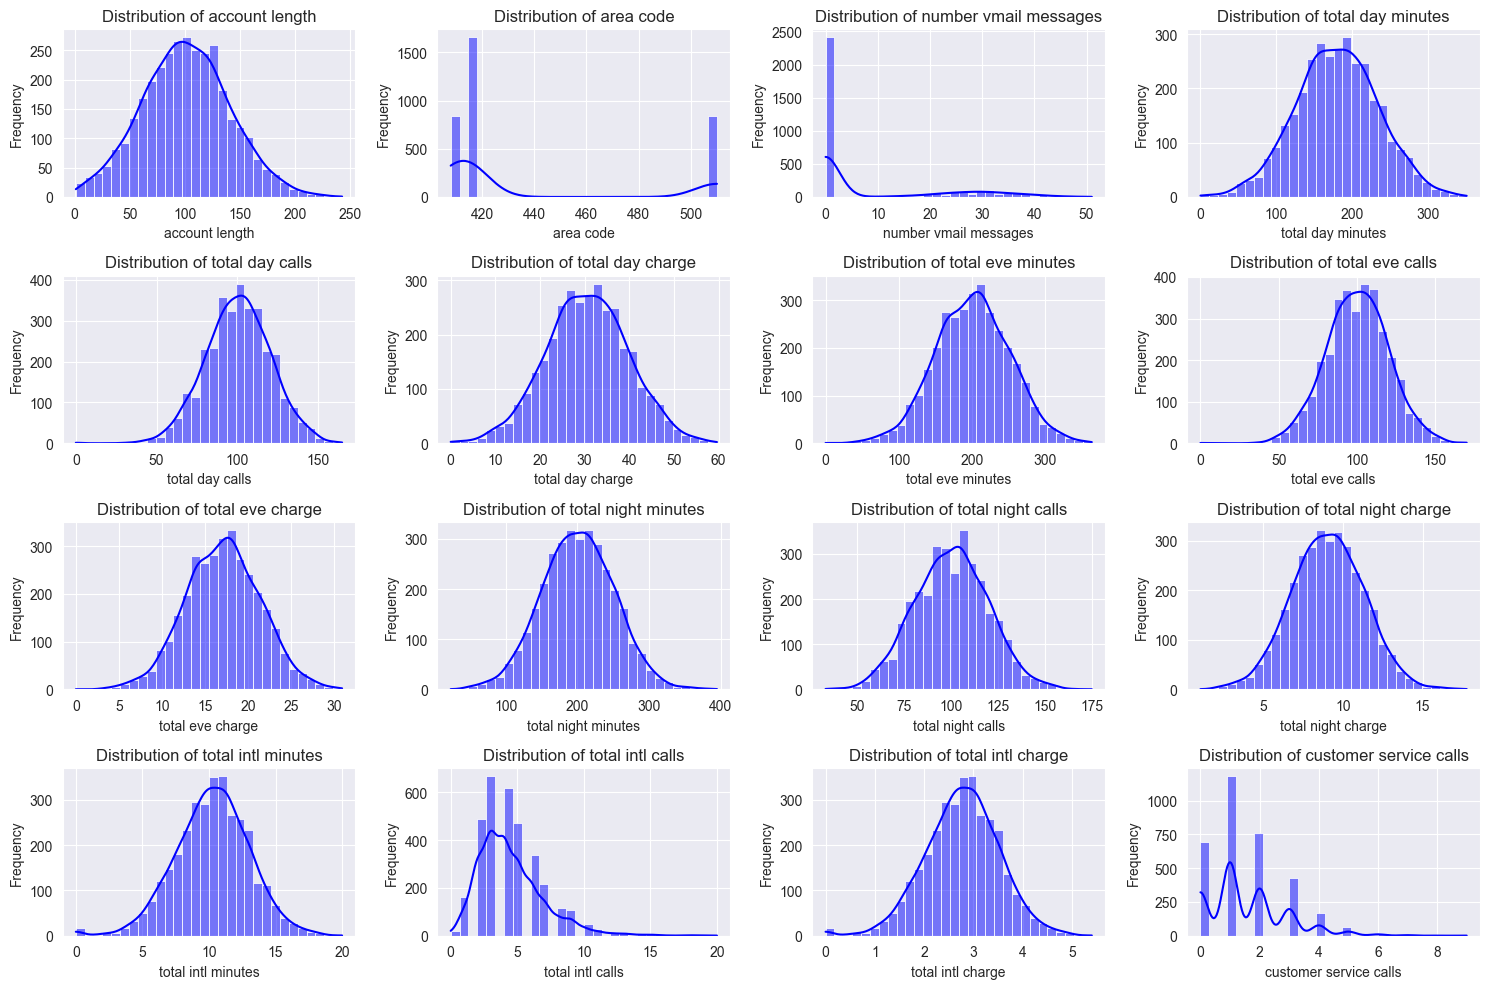

In [340]:
import seaborn as sns

# Calculate the number of rows and columns needed for subplots
num_features = len(numerical_features)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

# Visualize numerical features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, column in enumerate(numerical_features):
    ax = axes[i // num_cols, i % num_cols]  # Get the axis object from the axes array
    sns.histplot(data=df, x=column, kde=True, bins=30, color='blue', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Visualizing the numerical data revealed some interesting patterns. Customer tenure (account length) and call durations/charges across various time periods (day, evening, night, international) are right-skewed, suggesting most customers exhibit lower usage patterns. Total international calls might also lean towards higher call volumes for a smaller customer segment. Customer service calls show a multimodal distribution, indicating distinct groups with varying frequencies of contacting customer service. Exploring relationships between these features and potential outliers can provide further insights into customer behavior relevant to churn prediction.

##### Visualisation of Categorical Features

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom light blue color
light_blue = (100/255, 116/255, 255/255)
lighter_blue = (170/255, 186/255, 255/255)

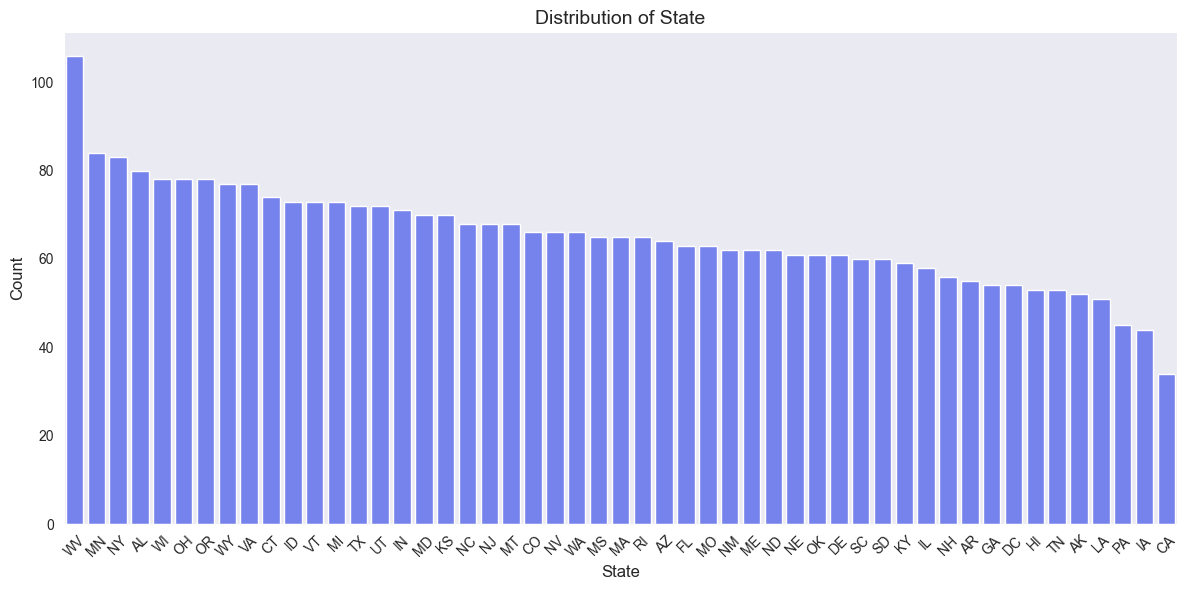

In [298]:
# Get the counts of each state and sort them in descending order
state_counts = df['state'].value_counts().sort_values(ascending=False).index

# Visualize distribution of 'state' with states arranged from largest to smallest count
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', color=light_blue, order=state_counts)
plt.title('Distribution of State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The majority of SyriaTel customers come from West Virginia, Minnesota and New York.

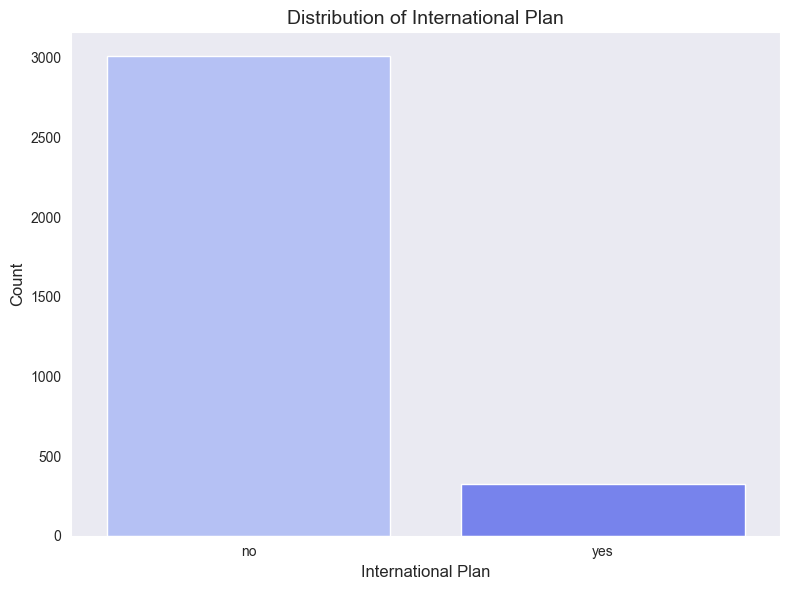

In [301]:
# Visualize distribution of 'international plan' 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='international plan', palette=[lighter_blue, light_blue])
plt.title('Distribution of International Plan', fontsize=14)
plt.xlabel('International Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [314]:
df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

* 3010 customers do not have a voice mail plan, while 323 customers do.

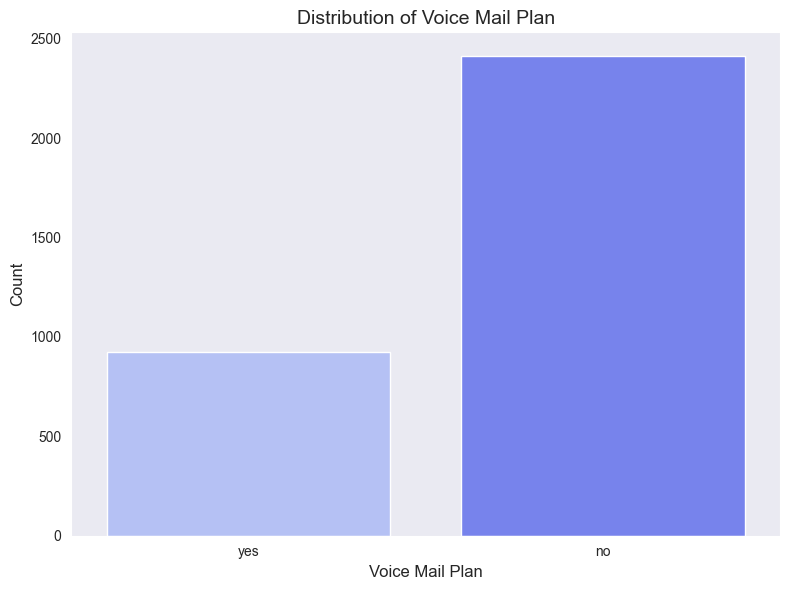

In [303]:
# Visualize distribution of 'voice mail plan' 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='voice mail plan', palette=[lighter_blue, light_blue])
plt.title('Distribution of Voice Mail Plan', fontsize=14)
plt.xlabel('Voice Mail Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [312]:
df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

* 2411 customers do not have a voice mail plan, while 922 customers do.

#### Distribution of Churn

The 'churn' variable delineates whether a customer has churned or not. The endeavor encompassed a univariate analysis to elucidate the distribution of churn within the dataset.

In [310]:
# Calculate the distribution of the 'churn' column
churn_distribution_summary = df['churn'].value_counts()

# Print the churn distribution summary
print("Churn Distribution Summary:")
print(churn_distribution_summary)

Churn Distribution Summary:
churn
False    2850
True      483
Name: count, dtype: int64


An in-depth exploration of churn was pursued by enumerating the count of customers who churned and those who retained their subscription. The results are as follows:

- Number of customers who churned: 483
- Number of customers who did not churn: 2850

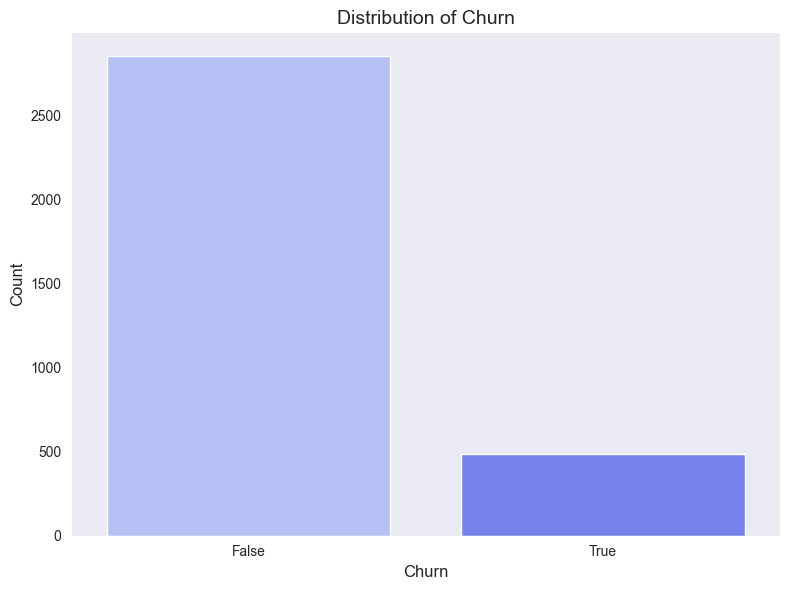

In [308]:
# Visualize distribution of 'churn' 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn', palette=[lighter_blue, light_blue])
plt.title('Distribution of Churn', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

#### 2. Bivariate Analysis

In this section of the analysis, a bivariate examination of the relationship between the first 8 numerical features in the dataset and the target variable 'churn' was conducted. The objective was to visualize how each numerical feature relates to the likelihood of churn. 


In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given DataFrame based on churn rate.
    """
    # Create figure and set its background color
    fig = plt.figure(figsize=(10, 5), facecolor='#EFEFEF')

    # Calculate the sum of churn for each category of the feature and sort in descending order
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)

    # Get the top 10 categories with the highest churn counts
    top_10_categories = churn_counts.head(10).index.tolist()

    # Create a bar plot of the feature, colored by churn
    sns.barplot(x=top_10_categories, y=churn_counts.loc[top_10_categories], palette=['#2196f3' if x%2 == 0 else '#0069c0' for x in range(len(top_10_categories))])

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set the title and labels
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Churn Count', fontsize=12)

    # Show the plot
    plt.show()


- **State against Churn**

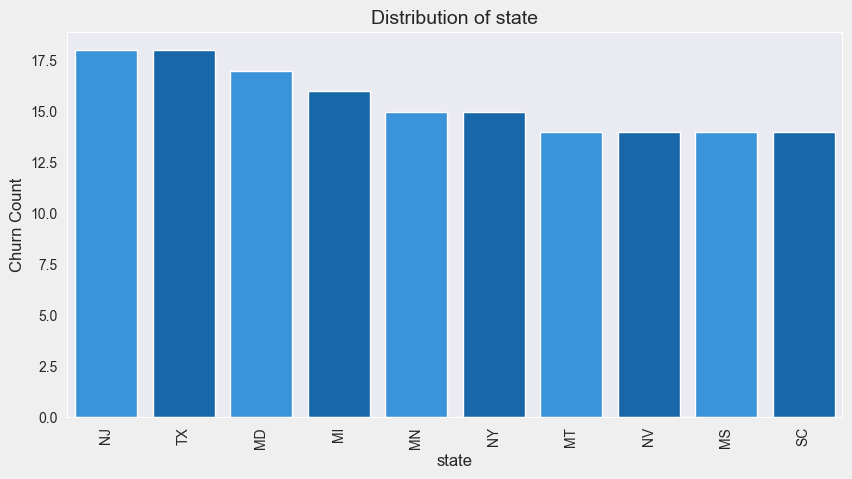

In [320]:
plot_categorical_distribution(df, 'state')

The largest portion of customers who churned hails from New Jersey, Texas, Maryland, Miami, and New York.

- **Voice Mail Plan Against Churn**

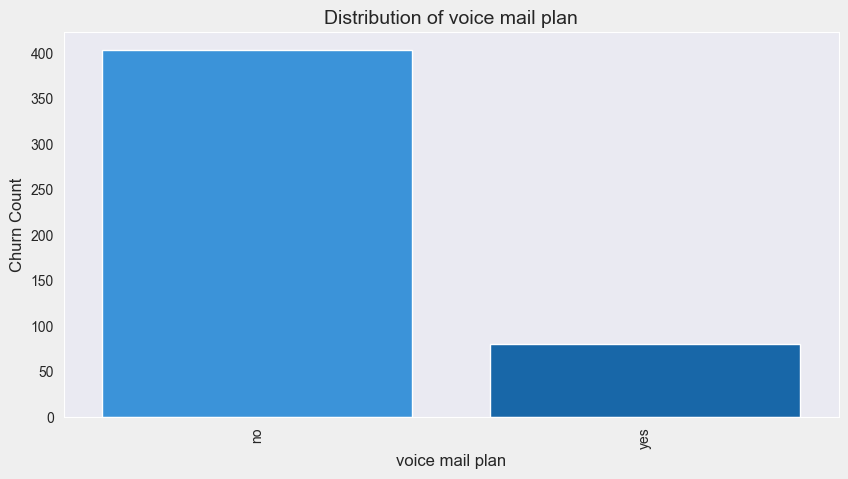

In [322]:
plot_categorical_distribution(df, 'voice mail plan')

Most of the customers who churned were not subscribed to a voicemail plan.

- **International Plan Against Churn**

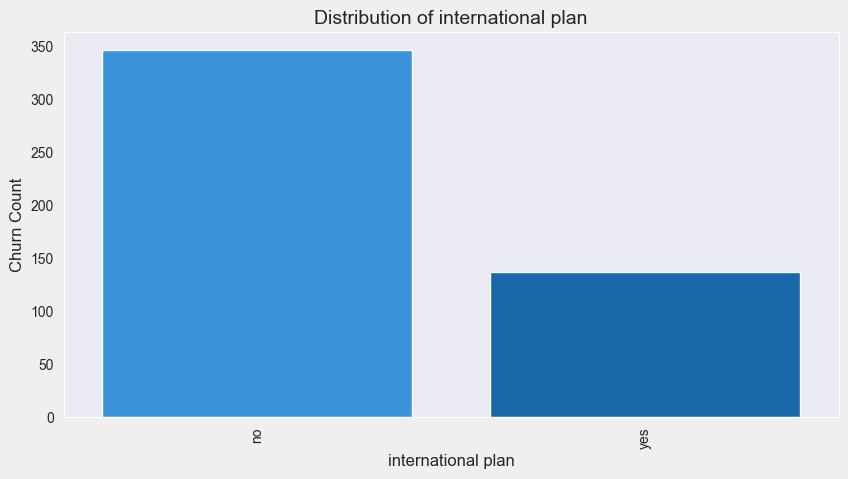

In [324]:

plot_categorical_distribution(df, 'international plan')

The majority of customers who churned were not enrolled in an international plan.

### Multivariate Analysis

**The** multivariate analysis involved examining the relationships between multiple variables simultaneously. In this study,how various features relate to the target variable (customer churn) when considered together was investigated.

A correlation matrix was utilized to uncover the correlations among different variables within the dataset.


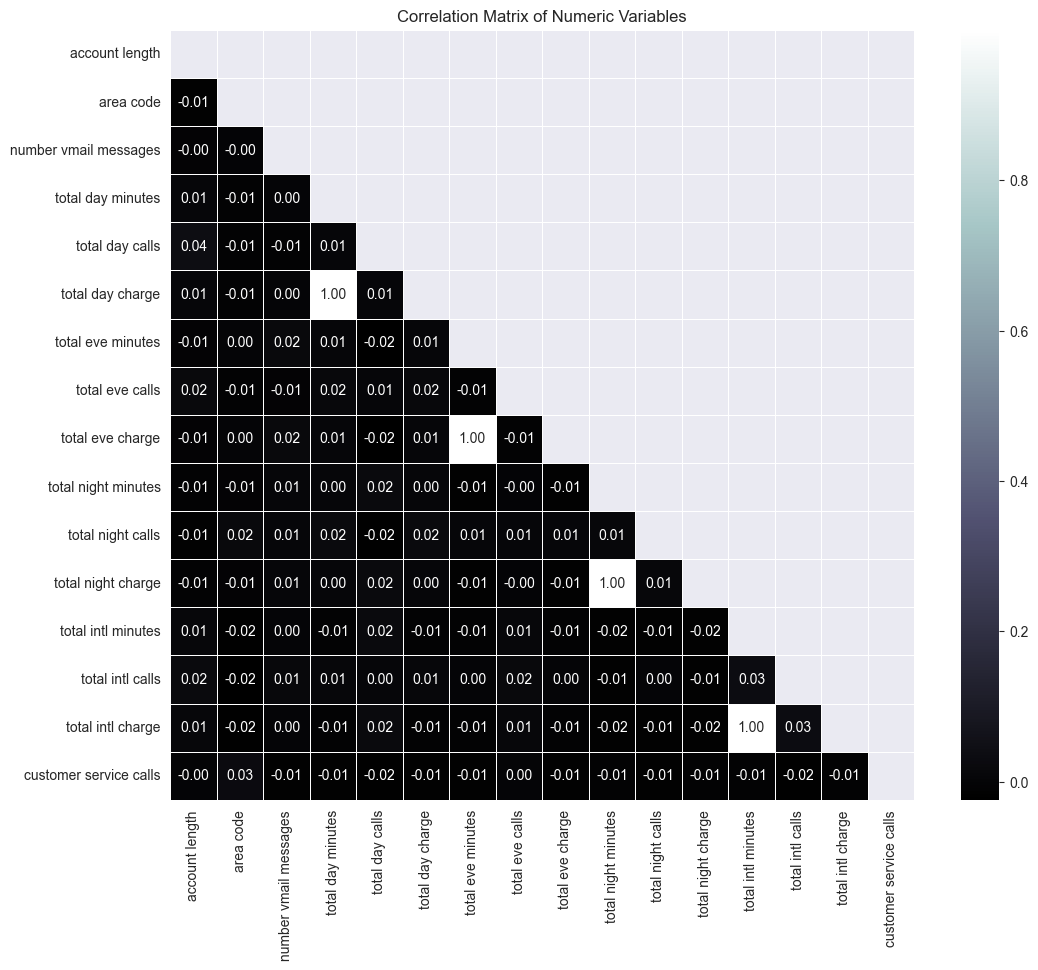

In [328]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Visualize correlation matrix
correlation_matrix = numeric_df.corr()

# Zero out lower triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='bone', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [182]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

##### Key Takeaways from Correlation Matrix:

- **Daytime, Evening, and Night Calls:** Strong positive correlations exist between call minutes, number of calls, and charges within each time period (day, evening, night). This suggests customers who make more calls during a specific time also spend more on those calls during that time.

- **Account Length:** A weak positive correlation exists between account length and total call minutes (day, evening, night). This indicates that customers who have been with SyriaTel longer tend to make slightly more calls, but the effect is weak.

- **International Calls:** A moderate positive correlation is seen between total international minutes, number of calls, and charges. Customers who make more international calls tend to spend more on them.

- **Customer Service Calls:** This feature shows weak or no correlations with most others. The number of customer service calls seems unrelated to calling habits or account tenure.

## Data Preprocessing

#### a. Label Encoding

Label Encoding enables the conversion of the label variables in the "international plan", "voice mail plan", and "churn" columns to a numeric form. The "Yes" and "No" categories in the "international plan" and "voice mail plan" columns are converted to 1 and 0, respectively, representing their presence or absence. In the "churn" column, where the target variable indicates customer churn, the "False" (non-churned) and "True" (churned) categories are converted to 0 and 1, respectively.

In [379]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns to be label encoded
cat_cols = ["international plan", "voice mail plan"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the changes
print(df.head())

  state  account length  area code phone number  international plan  \
0    KS             128        415     382-4657                   0   
1    OH             107        415     371-7191                   0   
2    NJ             137        415     358-1921                   0   
3    OH              84        408     375-9999                   1   
4    OK              75        415     330-6626                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ..


#### b. One-Hot Encoding

One-hot encoding is a technique used to convert categorical variables into a numerical format suitable for machine learning algorithms. It is particularly useful when dealing with categorical variables with multiple categories.

In [380]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(dtype=np.int64)

# Encode the "state" column
encoded_state = encoder.fit_transform(df[["state"]])

# Create a DataFrame with the encoded state columns
dummy_df_state = pd.DataFrame(encoded_state.toarray(), columns=encoder.get_feature_names_out(["state"]))

# Concatenate the encoded state columns with the original DataFrame
one_df = pd.concat([df, dummy_df_state], axis=1)

# Remove the original "state" column
one_df = one_df.drop(["state"], axis=1)

one_df.head(10)

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
5,118,510,391-8027,1,0,0,223.4,98,37.98,220.6,...,0,0,0,0,0,0,0,0,0,0
6,121,510,355-9993,0,1,24,218.2,88,37.09,348.5,...,0,0,0,0,0,0,0,0,0,0
7,147,415,329-9001,1,0,0,157.0,79,26.69,103.1,...,0,0,0,0,0,0,0,0,0,0
8,117,408,335-4719,0,0,0,184.5,97,31.37,351.6,...,0,0,0,0,0,0,0,0,0,0
9,141,415,330-8173,1,1,37,258.6,84,43.96,222.0,...,0,0,0,0,0,0,0,0,1,0


In [381]:
# Verify the changes
print(one_df.head())

   account length  area code phone number  international plan  \
0             128        415     382-4657                   0   
1             107        415     371-7191                   0   
2             137        415     358-1921                   0   
3              84        408     375-9999                   1   
4              75        415     330-6626                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total day charge  total eve minutes  ...  state_SD  state_TN  state_TX  \
0             45.07              197.4  ...  

In [382]:
# One-hot encoding for "area code" column
encoder_area_code = OneHotEncoder(sparse_output=False)  # Specify sparse_output=False
encoded_area_code = encoder_area_code.fit_transform(df[["area code"]])

# Create DataFrame with encoded area code columns and appropriate column names
dummy_df_area_code = pd.DataFrame(encoded_area_code, columns=encoder_area_code.get_feature_names_out(["area code"]))

# Concatenate the encoded area code columns with the original DataFrame
one_df = pd.concat([one_df, dummy_df_area_code], axis=1)

# Remove the original "area code" column
one_df = one_df.drop(["area code"], axis=1)

one_df.head(10)

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,382-4657,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,107,371-7191,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,137,358-1921,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0.0,1.0,0.0
3,84,375-9999,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,1.0,0.0,0.0
4,75,330-6626,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0.0,1.0,0.0
5,118,391-8027,1,0,0,223.4,98,37.98,220.6,101,...,0,0,0,0,0,0,0,0.0,0.0,1.0
6,121,355-9993,0,1,24,218.2,88,37.09,348.5,108,...,0,0,0,0,0,0,0,0.0,0.0,1.0
7,147,329-9001,1,0,0,157.0,79,26.69,103.1,94,...,0,0,0,0,0,0,0,0.0,1.0,0.0
8,117,335-4719,0,0,0,184.5,97,31.37,351.6,80,...,0,0,0,0,0,0,0,1.0,0.0,0.0
9,141,330-8173,1,1,37,258.6,84,43.96,222.0,111,...,0,0,0,0,0,1,0,0.0,1.0,0.0


In [385]:
# Drop the 'phone number' column
newdf.drop(columns=['phone number'], inplace=True)

#### c. Scaling Numerical Features

Scaling numerical features is important for algorithms that are sensitive to feature scales, such as gradient descent-based algorithms and distance-based algorithms.

In [384]:
newdf = one_df

In [386]:
newdf.dtypes

account length             int64
international plan         int64
voice mail plan            int64
number vmail messages      int64
total day minutes        float64
                          ...   
state_WV                   int64
state_WY                   int64
area code_408            float64
area code_415            float64
area code_510            float64
Length: 72, dtype: object

In [387]:
from sklearn.preprocessing import MinMaxScaler

# Define numeric columns
numeric_columns = [col for col in newdf.columns if newdf[col].dtype != 'object']

# Drop rows with NaN values
newdf = newdf.dropna(subset=numeric_columns)

# Initialize MinMaxScaler 
scaler = MinMaxScaler()  

if len(numeric_columns) == 0:
    print("No numeric columns found")
else:
    # Clean numeric columns by replacing NaNs with mean values
    newdf[numeric_columns] = newdf[numeric_columns].fillna(newdf[numeric_columns].mean())

    # Convert any non-numeric values to numeric or NaN
    newdf[numeric_columns] = newdf[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Scale the numeric columns
    newdf[numeric_columns] = scaler.fit_transform(newdf[numeric_columns])

    # Convert scaled data to a DataFrame
    df_scaled = pd.DataFrame(newdf[numeric_columns], columns=numeric_columns)

    # Print the first few rows of the scaled DataFrame
    print(df_scaled.head())

   account length  international plan  voice mail plan  number vmail messages  \
0        0.524793                 0.0              1.0               0.490196   
1        0.438017                 0.0              1.0               0.509804   
2        0.561983                 0.0              0.0               0.000000   
3        0.342975                 1.0              0.0               0.000000   
4        0.305785                 1.0              0.0               0.000000   

   total day minutes  total day calls  total day charge  total eve minutes  \
0           0.755701         0.666667          0.755701           0.542755   
1           0.460661         0.745455          0.460597           0.537531   
2           0.693843         0.690909          0.693830           0.333242   
3           0.853478         0.430303          0.853454           0.170195   
4           0.475200         0.684848          0.475184           0.407754   

   total eve calls  total eve charge  ...  s


#### d. Splitting the Data

Before proceeding with modelling, it's essential to split the data into training and testing sets to ensure unbiased evaluation of the models.

In [388]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = newdf.drop(columns=['churn'])  # Features
y = newdf['churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2666, 71)
y_train shape: (2666,)
X_test shape: (667, 71)
y_test shape: (667,)


##### e. Handling Class Imbalance 
Class imbalance occurs when one class has significantly fewer samples than the other class(es). This can lead to biased models that perform poorly on the minority class. We are applying SMOTE (Synthetic Minority Over-sampling Technique) to address this issue by generating synthetic samples for the minority class, thereby creating a balanced training dataset. This helps improve the model's performance by ensuring that it learns from a more representative distribution of the data.

In [391]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Modelling

### Introduction
Modelling is a crucial step in any machine learning project, where we train predictive models on the available data to make accurate predictions or decisions on unseen data. In the context of the SyriaTel Customer Churn project, we aim to build a classifier that predicts whether a customer will churn or not based on various features such as call usage, account details, and customer service interactions.

### Training Methods
For the SyriaTel Customer Churn project, we'll employ several machine learning algorithms to train our predictive models. These algorithms include:

1. **Logistic Regression**: A linear model used for binary classification tasks. It models the probability of a binary outcome based on one or more predictor variables.

2. **Decision Trees**: A non-linear model that splits the data into hierarchical decision nodes based on feature values, ultimately leading to a prediction at the leaf nodes.

3. **Random Forests**: An ensemble of decision trees where multiple trees are trained on different subsets of the data and predictions are made by averaging or voting.

4. **XGBoost**: An optimized implementation of gradient boosting, which sequentially builds an ensemble of weak learners to improve predictive performance.

5. **Support Vector Machines (SVM)**: A powerful algorithm that finds the optimal hyperplane to separate different classes in the feature space.

6. **K-Nearest Neighbors (KNN)**: A simple algorithm that makes predictions based on the majority class of the k-nearest neighbors in the feature space.

#### 1. Logistic Regression
Logistic regression is a commonly used algorithm for binary classification tasks like customer churn prediction. In logistic regression, the algorithm models the probability that a given instance belongs to a particular class using a logistic function.

##### Training the Logistic Regression Model
To train the logistic regression model, we use the training data containing both numerical and encoded categorical features. The model is trained to predict whether a customer will churn or not based on the available features.

##### Evaluation Metrics
We evaluate the performance of the logistic regression model using the following evaluation metrics:
- **Accuracy**: The proportion of correctly classified instances.
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall**: The proportion of true positive predictions among all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, providing a balanced measure of model performance.
- **ROC-AUC Score**: The area under the receiver operating characteristic (ROC) curve, which measures the model's ability to distinguish between positive and negative instances.

##### Cross-Validation
We also perform cross-validation to obtain more robust estimates of the logistic regression model's performance. Cross-validation helps assess the model's generalization performance and reduces the risk of overfitting to the training data.

In [392]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.856071964017991

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       566
         1.0       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



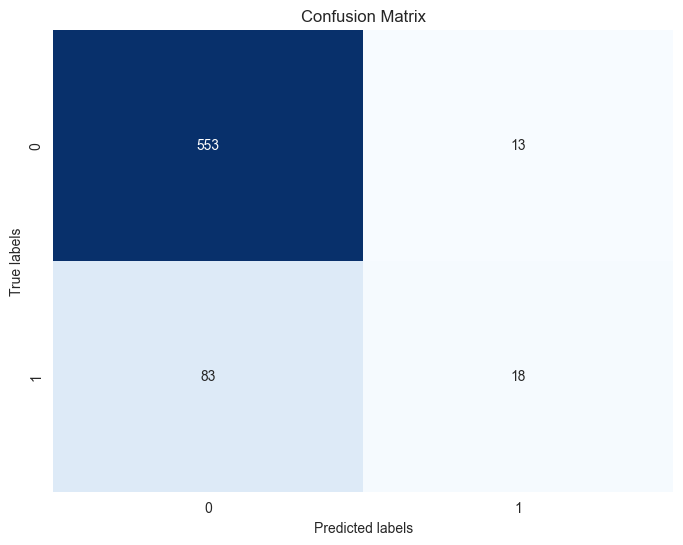

In [394]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

* Results

In the logistic regression model, we achieved an accuracy of 0.856. The precision for predicting churn (1.0) is relatively low at 0.58, indicating that the model's ability to correctly identify churn cases is limited. The recall for predicting churn is also low at 0.18, suggesting that the model misses a significant number of actual churn cases. These results indicate that the logistic regression model may not be the best choice for this classification task

### 2. Decision Trees

Decision Trees are non-parametric supervised learning models used for both classification and regression tasks. The model works by recursively partitioning the feature space into smaller regions, with each split being determined by the feature that provides the most information gain or reduction in impurity. 


In [416]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9310344827586207

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       566
         1.0       0.78      0.75      0.77       101

    accuracy                           0.93       667
   macro avg       0.87      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



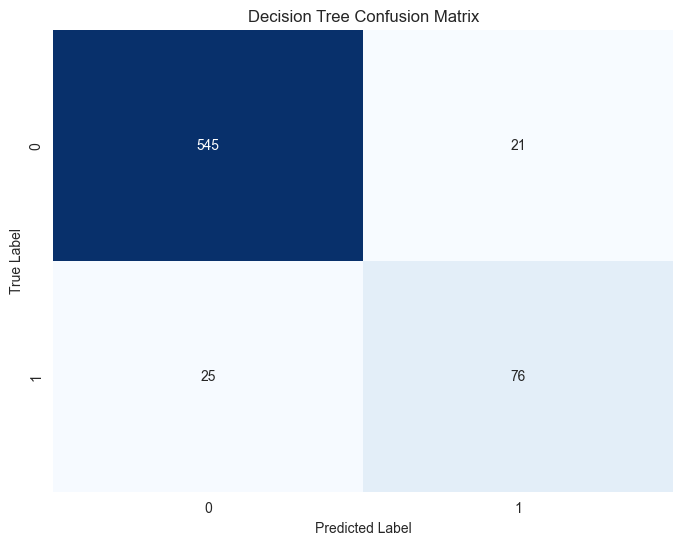

In [417]:
# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* Results

In the decision tree model, we achieved an accuracy of 0.931. The precision for predicting churn (1.0) is 0.78, indicating that the model correctly identifies a significant portion of churn cases. The recall for predicting churn is 0.75, suggesting that the model captures a good proportion of actual churn cases. These results indicate that the decison tree model performs reasonably well for this classification task.

### 3. Random Forests

In [399]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forests
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Generate classification report for Random Forests
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9430284857571214

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       566
         1.0       1.00      0.62      0.77       101

    accuracy                           0.94       667
   macro avg       0.97      0.81      0.87       667
weighted avg       0.95      0.94      0.94       667



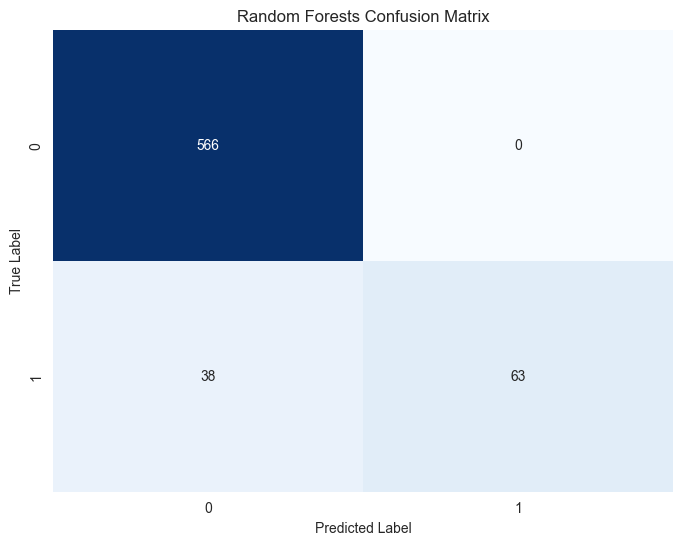

In [398]:
# Generate confusion matrix for Random Forests
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forests Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* Results

In the Random Forest model, we achieved an accuracy of 0.943. The precision for predicting churn (1.0) is 1.00, indicating that the model correctly identifies all churn cases. However, the recall for predicting churn is 0.62, suggesting that the model captures only a portion of actual churn cases. These results indicate that while the random forest model performs well overall, it may need improvement in capturing all instances of churn.

### 4. XG Boost

In [401]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9610194902548725

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       566
         1.0       0.94      0.79      0.86       101

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



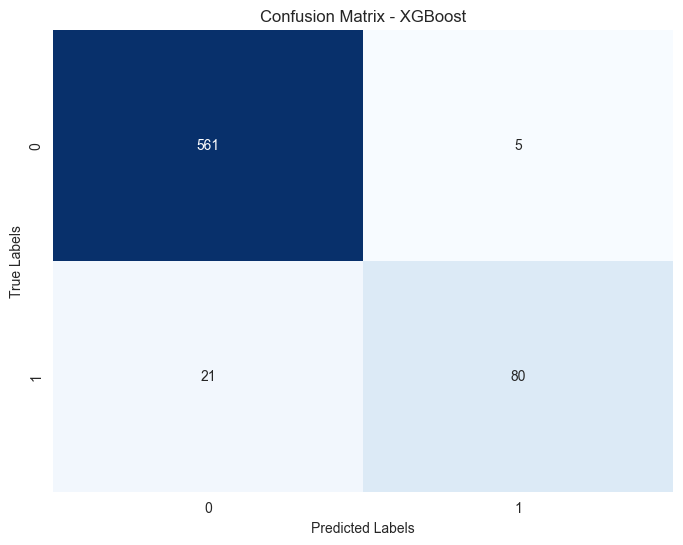

In [403]:
# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

* Results

The XGBoost model achieved an accuracy of 0.961. It exhibits strong performance in predicting non-churn cases (0.0) with a precision of 0.96 and recall of 0.99. However, its performance in predicting churn cases (1.0) is slightly lower, with a precision of 0.94 and recall of 0.79. Overall, the model demonstrates robust performance in accurately identifying non-churn cases but may require some improvement in capturing all instances of churn.

### 5. K-Nearest Neighbors(KNN) model

In [406]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Generate predictions
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8455772113943029

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       566
         1.0       0.42      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.64      0.52      0.50       667
weighted avg       0.79      0.85      0.79       667



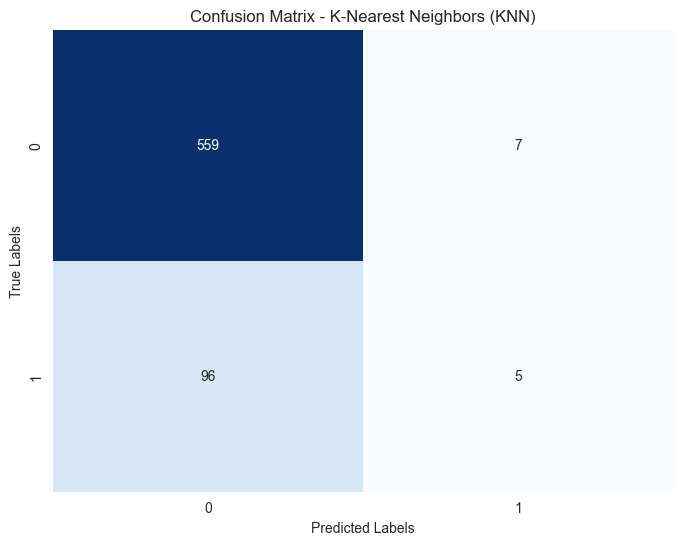

In [407]:
# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

* Results

The KNN model achieved an accuracy of 0.846. It demonstrates strong performance in predicting non-churn cases (0.0) with a precision of 0.85 and recall of 0.99. However, its performance in predicting churn cases (1.0) is relatively poor, with a precision of 0.42 and recall of 0.05. Overall, while the model performs well in identifying non-churn cases, it struggles to effectively identify churn cases.

### 6. Suppor Vector Machine (SVM) model

In [408]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.848575712143928

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       566
         1.0       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667



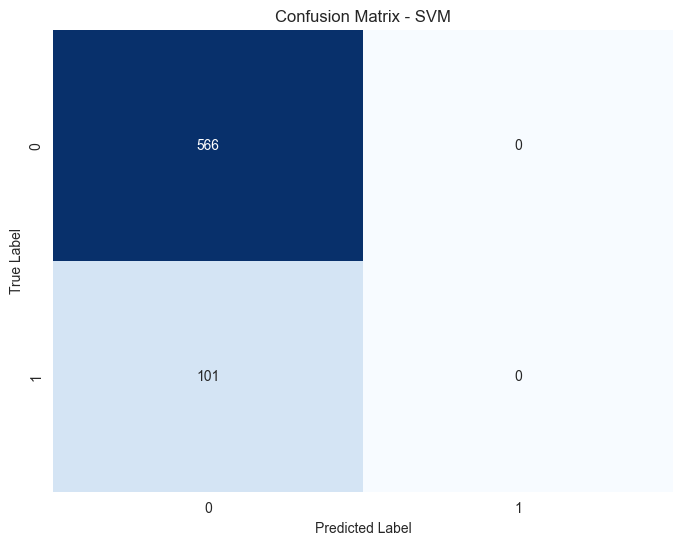

In [410]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

* Results

The SVM model achieved an accuracy of 0.849. It shows high precision and recall for non-churn cases (0.0), correctly identifying all instances. However, it fails to predict any churn cases (1.0), resulting in a precision and recall of 0.00 for this class. The model's performance indicates that it may not be suitable for effectively identifying churn cases in this dataset.

## Hyperparameter Tuning